In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

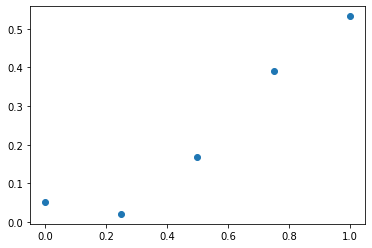

In [2]:
def f(x):
  return 0.5*(x)*(x**4)/(.05+(x**4))
npts=5
np.random.seed(0)
X=np.linspace(0,1,npts)
y0=f(X)+0.03*np.random.normal(0,1,npts)
plt.scatter(X,y0)


In [3]:
Xsq=np.square(X)
A1=np.stack((np.ones(npts),X,Xsq)).T
mpcomp = np.linalg.inv(A1.T.dot(A1)).dot(A1.T) # expression for Moore-Penrose→pseudoinverse
mpcall = np.linalg.pinv(A1) # pre-defined function call
print("Difference between Moore-Penrose pseudoinverse computed and by function call:\n",
  mpcomp-mpcall)
what = np.linalg.pinv(A1).dot(y0)
print("Regression performed by best-fit formula: ",what)
print("Regression performed by numpy function call: ", np.polyfit(X,y0,deg=2))
res = np.atleast_2d(y0-A1.dot(what)) # residual vector
print("Length of residual: ",np.sqrt(np.square(res).sum()))
# Print the dot product of res with each column of design matrix A1;
# each column entry should be close to 0.
print("Dot product of residual with design matrix:\n",res.dot(A1))


Difference between Moore-Penrose pseudoinverse computed and by function call:
 [[ 0.00000000e+00  0.00000000e+00 -7.21644966e-16 -9.99200722e-16
  -1.65145675e-15]
 [ 0.00000000e+00 -5.55111512e-16  2.66453526e-15  8.88178420e-16
   6.66133815e-16]
 [ 1.77635684e-15  8.88178420e-16 -2.66453526e-15  6.66133815e-16
   0.00000000e+00]]
Regression performed by best-fit formula:  [0.02762174 0.04953737 0.4818957 ]
Regression performed by numpy function call:  [0.4818957  0.04953737 0.02762174]
Length of residual:  0.08268713640177253
Dot product of residual with design matrix:
 [[-1.09634524e-15 -8.04911693e-16 -6.62664368e-16]]


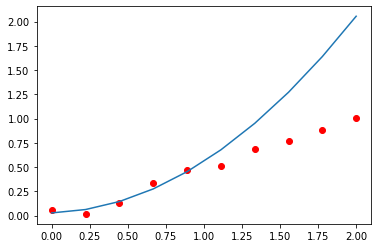

In [4]:
npred=10
Xpred = np.linspace(0,2,npred)
A2pred = np.stack((np.ones(npred),Xpred,np.square(Xpred))).T
np.random.seed(0)
y0new=f(Xpred)+0.03*np.random.normal(0,1,npred)
y2pred = A2pred.dot(what)
plt.plot(Xpred,y2pred)
plt.scatter(Xpred,y0new, color='r')


Length of residual:  0.13977440208631128


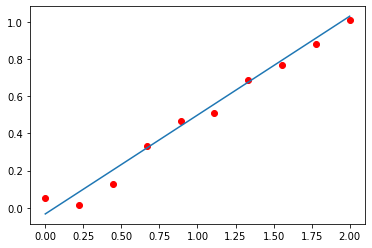

In [5]:
Alin=np.stack((np.ones(npts),X)).T
w0hat = np.linalg.pinv(Alin).dot(y0)
res0 = np.atleast_2d(y0-Alin.dot(w0hat)) # residual vector
print("Length of residual: ",np.sqrt(np.square(res0).sum()))
Alinpred = np.stack((np.ones(npred),Xpred)).T
y0pred = Alinpred.dot(w0hat)
plt.plot(Xpred,y0pred)
plt.scatter(Xpred,y0new, color='r')

Text(0.5, 0, 'function somefun to fit')

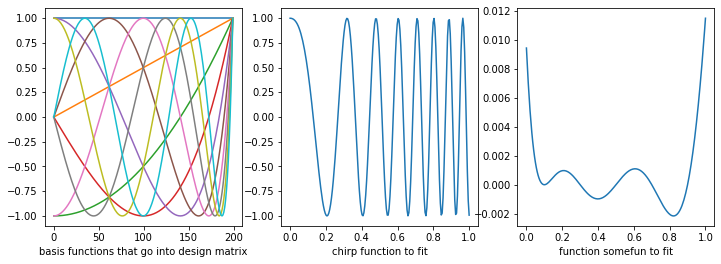

In [6]:
def chf(x, n): # These are the basis functions to be used
  return np.cos(n*np.arccos(x))
def chirp(w1, w2, x, M): # function to draw datapoints from
  return np.cos(w1*x + (1/M)*(w1-w2)*x**2)
def somefun(x): # yet another -- you should try out your own
  return 10*np.exp(-2*x**2)*(x - 0.9)*(x - 0.7)*(x - 0.5)*(x - 0.3)*(x - 0.1)**2
X1=np.linspace(0,1,200)
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(12,4))
for n in range(10):
  ax[0].plot(chf(X1,n))
ax[1].plot(X1,chirp(7.,6.,X1,.025))
ax[2].plot(X1,somefun(X1))
ax[0].set_xlabel('basis functions that go into design matrix')
ax[1].set_xlabel('chirp function to fit')
ax[2].set_xlabel('function somefun to fit')


Text(0.5, 0.98, 'Fitting chirp')

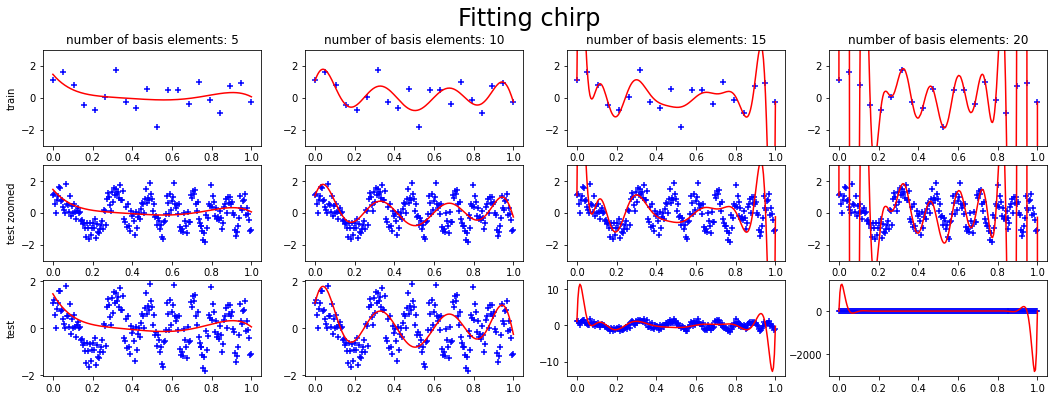

In [7]:
num_basis = [5, 10, 15, 20]
noise = 0.5
fig, ax = plt.subplots(nrows=3,ncols=len(num_basis),figsize=(18,6))
ntrain=20
Xtrain=np.linspace(0,1,ntrain)
def F(x):
  return chirp(7.,6.,x,.025)
ytrain=np.atleast_2d(F(Xtrain)+noise*np.random.normal(0,1,ntrain)).T
ntest=200
Xtest=np.linspace(0,1,ntest)
ytest=F(Xtest)+noise*np.random.normal(0,1,ntest)
for i, nb in enumerate(num_basis):
  ax[0][i].scatter(Xtrain,ytrain,marker='+',color='b')
  Amat = [np.ones(ntrain)]
  Amat_test = [np.ones(ntest)]
  for n in range(nb):
    Amat.append(chf(Xtrain,n+1))
  Amat = np.vstack(Amat).T
  what = np.linalg.pinv(Amat).dot(ytrain)
  y1train=Amat.dot(what)
  for n in range(nb):
    Amat_test.append(chf(Xtest,n+1))
  Amat_test = np.vstack(Amat_test).T
  ypred=Amat_test.dot(what)
  ax[1][i].scatter(Xtest,ytest,color='b',marker='+')
  ax[0][i].plot(Xtest,ypred,color='r')
  ax[1][i].plot(Xtest,ypred,color='r')
  ax[0][i].set_ylim([-3,3])
  ax[1][i].set_ylim([-3,3])
  ax[2][i].scatter(Xtest,ytest,color='b',marker='+')
  ax[2][i].plot(Xtest,ypred,color='r')
  title = "number of basis elements: "+str(num_basis[i])
  ax[0][i].set_title(title)
  title = ""
ax[0][0].set_ylabel('train')
ax[1][0].set_ylabel('test zoomed')
ax[2][0].set_ylabel('test')
fig.suptitle(r'Fitting chirp',fontsize=24)

Text(0.5, 0.98, 'Fitting somefun')

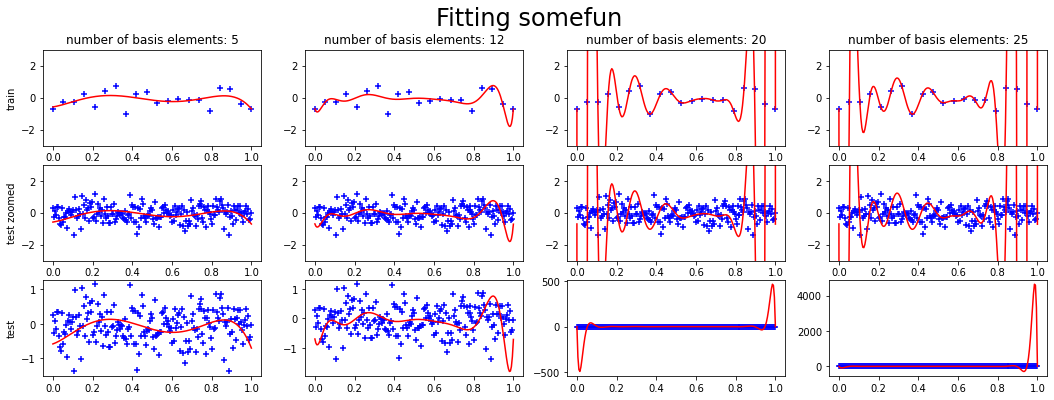

In [8]:
# Exactly the same as the previous cell, but for a different target function
num_basis = [5, 12, 20, 25]
noise = 0.5
fig, ax = plt.subplots(nrows=3,ncols=len(num_basis),figsize=(18,6))
ntrain=20
Xtrain=np.linspace(0,1,ntrain)
def F(x):
# return chirp(7.,6.,x,.025)
  return somefun(x)
ytrain=np.atleast_2d(F(Xtrain)+noise*np.random.normal(0,1,ntrain)).T
ntest=200
Xtest=np.linspace(0,1,ntest)
ytest=F(Xtest)+noise*np.random.normal(0,1,ntest)
for i, nb in enumerate(num_basis):
  ax[0][i].scatter(Xtrain,ytrain,marker='+',color='b')
  Amat = [np.ones(ntrain)]
  Amat_test = [np.ones(ntest)]
  for n in range(nb):
    Amat.append(chf(Xtrain,n+1))
  Amat = np.vstack(Amat).T
  what = np.linalg.pinv(Amat).dot(ytrain)
  y1train=Amat.dot(what)
  for n in range(nb):
    Amat_test.append(chf(Xtest,n+1))
  Amat_test = np.vstack(Amat_test).T
  ypred=Amat_test.dot(what)
  ax[1][i].scatter(Xtest,ytest,color='b',marker='+')
  ax[0][i].plot(Xtest,ypred,color='r')
  ax[1][i].plot(Xtest,ypred,color='r')
  ax[0][i].set_ylim([-3,3])
  ax[1][i].set_ylim([-3,3])
  ax[2][i].scatter(Xtest,ytest,color='b',marker='+')
  ax[2][i].plot(Xtest,ypred,color='r')
  title = "number of basis elements: "+str(num_basis[i])
  ax[0][i].set_title(title)
  title = ""
ax[0][0].set_ylabel('train')
ax[1][0].set_ylabel('test zoomed')
ax[2][0].set_ylabel('test')
fig.suptitle(r'Fitting somefun',fontsize=24)

In [9]:
[u,s,v]=np.linalg.svd(Amat)
print(Amat.shape,u.shape, s.shape, v.shape)

(20, 26) (20, 20) (20,) (26, 26)


In [10]:
def smat_reduced(shape, sdiag, n):
# creates matrix with n elements of sdiag along diagonal
  smat = np.zeros(shape, dtype=complex)
  drop = len(sdiag)-n
  if (drop > 0):
    sdiag=np.concatenate((sdiag[:-drop],np.zeros(drop)))
  smat[:len(sdiag),:len(sdiag)]=np.diag(sdiag)
  return smat

def svd_to_mat(u, s, v, n):
# computes a rank n matrix using (u, s, v) coming from svd(some matrix)
  smat = smat_reduced((len(u),len(v)),s,n)
  return np.dot(u,np.dot(smat,v))
def svd_reconstruction_error(mat, n):
  [u, s, v] = np.linalg.svd(mat)
  # the error upon creating rank n matrix from (u, s, v) computed here
  return np.square(mat-svd_to_mat(u,s,v,n)).sum()


In [11]:
print(svd_reconstruction_error(Amat,20))

(7.8286163427646385e-28+0j)
